# Aim: Stock Price Prediction Using Linear Regression
environment: JupyterLab Version 3.0.7 on AWS EC2

dataset: [TSLA;Yahoo Finance](https://query1.finance.yahoo.com/v7/finance/download/TSLA?period1=1618375180&period2=1649911180&interval=1d&events=history&includeAdjustedClose=true
)

In [86]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load dataset

In [87]:
df = pd.read_csv('TSLA.csv')

## Exploratory data analysis

In [88]:
#dimensions of dataset (row,column)
df.shape

(254, 7)

In [89]:
#datatypes of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       254 non-null    object 
 1   Open       254 non-null    float64
 2   High       254 non-null    float64
 3   Low        254 non-null    float64
 4   Close      254 non-null    float64
 5   Adj Close  254 non-null    float64
 6   Volume     254 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.0+ KB


In [90]:
#first 5 rows of data
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-04-14,770.700012,780.789978,728.030029,732.229980,732.229980,49017400
1,2021-04-15,743.099976,743.690002,721.309998,738.849976,738.849976,27848900
2,2021-04-16,728.650024,749.409973,724.599976,739.780029,739.780029,27979500
3,2021-04-19,719.599976,725.400024,691.799988,714.630005,714.630005,39686200
4,2021-04-20,717.419983,737.250000,710.690002,718.989990,718.989990,35609000


In [91]:
#statistical tendencies
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,254.000000,254.000000,254.000000,254.000000,254.000000,2.540000e+02
mean,836.094488,854.628029,817.262560,836.384761,836.384761,2.506423e+07
std,177.432117,183.599282,169.487398,176.850683,176.850683,9.001270e+06
min,552.549988,566.210022,546.979980,563.460022,563.460022,9.800600e+06
25%,684.102493,697.552521,672.914994,685.100021,685.100021,1.879225e+07
50%,791.590027,805.285004,778.514984,792.774993,792.774993,2.348270e+07
75%,1000.817520,1023.817490,976.549988,1007.602493,1007.602493,2.971858e+07
max,1234.410034,1243.489990,1217.000000,1229.910034,1229.910034,6.285210e+07


## Extracting Required columns

In [103]:
#select date, close price; other columns are irrelevant for this task
df_close = df[['Date','Close']]

#removed hyphens to interpret date as integers
#df_close['Date'] = df_close['Date'].str.replace(r'\D', '')
#discarded >> converting to int was discarded because, it was found that linear regressor will consider it as a base10 number,
#but date is actually not + 1unit of change in the number will not represent 1unit change in a day, hence the 
#final results will be skewed

#change column 'Date' to 'datetime'
df_close['Date'] = pd.to_datetime(df_close['Date'])
df_close.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    254 non-null    datetime64[ns]
 1   Close   254 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.1 KB


/opt/conda/envs/rapids/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


## Visualize dataset

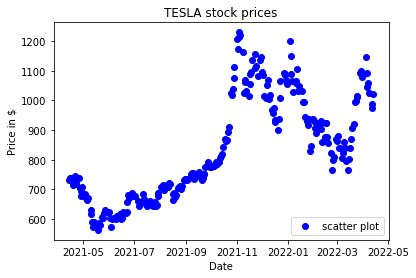

In [105]:
plt.scatter(df_close['Date'], df_close['Close'], color='blue', label='scatter plot')
plt.title('TESLA stock prices')
plt.xlabel('Date')
plt.ylabel('Price in $')
plt.legend(loc=4)
plt.show()

## spliting the dataset into train and test set and reshape

In [95]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_close, test_size=0.33, random_state=27)

In [106]:
#this goes with the crude assumption that index can be used to represent 1unit of change in date, 
#since date as such cannot be used for linearRegression as its not strictly integer
X_train = np.array(train.index).reshape(-1,1)
y_train = train['Close']
X_test = np.array(test.index).reshape(-1,1)
y_test = test['Close']

#verify shape of train and test set
print(X_train.shape) 
print(y_train.shape)
print(X_test.shape) 
print(y_test.shape)

(170, 1)
(170,)
(84, 1)
(84,)


## fit into model

In [107]:
#instantiate model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

#creating DataFrame to plot actual and predicted values
df_close_pred = test[['Date','Close']]
df_close_pred['Prediction'] = y_pred


## model representation
Linear regression follows Linear Equation y = mx + c
where,
m = slope of the line
c = y intercept

m and c are the parameters to be found in the equation.

fitting the model on this dataset finds the optimum value of m and c. that line will represent the dataset as close as possible, given the assumption dataset has to be correlated linearly.

In [131]:
#the parameters are
print("slope m is {:.4f}".format(lr.coef_[0]))
print('interpretation: for 1unit of change in unit of date, here index, there is a {:.4f} increase in price'.format(lr.coef_[0]))
print("y intercept c is ",lr.intercept_)
print('interpretation: the line is above the cooridnate(0,0) by distance {:.4f} unit along the y axis'.format(lr.intercept_))
print("hence, then resulting equation is y = {:.4f} x + {:.4f}".format(lr.coef_[0],lr.intercept_))

slope m is 1.7191
interpretation: for 1unit of change in unit of date, here index, there is a 1.7191 increase in price
y intercept c is  609.772899387955
interpretation: the line is above the cooridnate(0,0) by distance 609.7729 unit along the y axis
hence, then resulting equation is y = 1.7191 x + 609.7729


## model performance
### RMSE 

In [124]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE value: {:.4f}".format(rmse))

RMSE value: 121.6480


### R2 score

In [125]:
from sklearn.metrics import r2_score
print("R2 score: {:.4f}".format(r2_score(y_test, y_pred)))

R2 score: 0.5380


## Analysis

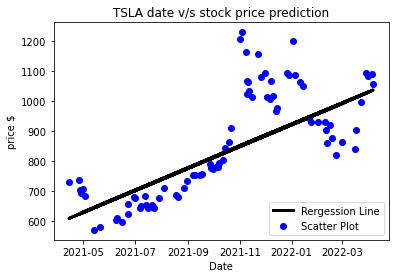

In [101]:
#test data is plotted and prediction
plt.scatter(df_close_pred['Date'], df_close_pred['Close'], color='blue', label='Scatter Plot')
plt.plot(df_close_pred['Date'], df_close_pred['Prediction'], color='black', linewidth=3, label='Rergession Line')
plt.title('TSLA date v/s stock price prediction')
plt.xlabel('Date')
plt.ylabel('price $')
plt.legend(loc=4)
plt.show()

# Conclusion

perfomance metrics RMSE and R2 scores shows that model performs poorly.
RMSE should as low as possible (ideal scenario: close to zero) and R2 score which represent the variation, should be as close to 1. In industrial use case it should be >0.7

### Errors identified and solutions
1. base assumption of TSLA is wrong, it doesnt not clearly follow linear trend --> a less volatile stock will work better on the same setting
2. less features and degree of polynomial --> more number of features and polynomial regression will work better
3. volatility --> if the stock is temporarily volatile, a longer timeframe will help to reduce the effect of temporary volatility, but it will still fail to predict the price for volatile timeframes.


#### Reference
1. Machine Learning on Coursera by Andrew Ng
2. [Simple Linear Regression Project-GitHub](https://github.com/pb111/Simple-Linear-Regression-Project/blob/master/SLRProject.ipynb)
3. [Predicting Stock Prices with Linear Regression-GitHub](https://github.com/mediasittich/Predicting-Stock-Prices-with-Linear-Regression/blob/master/Predicting%20Stock%20Prices%20with%20Linear%20Regression.ipynb)